## `query`

In [4]:
import matplotlib.pyplot as plt 
from plotnine import *
import numpy as np 
import pandas as pd
np.random.seed(1)
df=pd.DataFrame(np.random.normal(size=(15,4)),columns=list('ABCD'))

In [10]:
df.query('A>0 & B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


In [11]:
df.query('A>0 and B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


- lambda 사용할 때 &로 묶을 땐 and와의 차이점이 있었는데 query에선 없는 것 같음

In [12]:
# df.query('A<B<C')

### `A열 평균`

In [13]:
df.A.mean()

-0.018839420539994597

In [15]:
df['A'].mean() 

-0.018839420539994597

In [16]:
# df.query('A>-0.018839420539994597')

In [17]:
meanA=df.A.mean()

In [20]:
# df.query('A> @meanA') #`@meanA` 대신 `@df.A.mean()` 가능

In [21]:
# df.query(' A> @meanA and A<0.8')

In [23]:
# df.query('index==0 or 3 <= index <=5  or 9<=index <=11')

In [24]:
# df.query('index==0 or index ==[8,9,10]')

In [25]:
i1= np.arange(3) # 0,1,2를 의미

In [26]:
df.query('index in @i1  or index==5')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
5,-1.100619,1.144724,0.901591,0.502494


### `날짜 인덱싱`

In [29]:
df2=pd.DataFrame(np.random.normal(size=(10,4)), columns=list('ABCD'), 
                 index=pd.date_range('20201226',periods=10))

In [30]:
df2

,A,B,C,D
2020-12-26,-0.186570,-0.101746,0.868886,0.750412
2020-12-27,0.529465,0.137701,0.077821,0.618380
2020-12-28,0.232495,0.682551,-0.310117,-2.434838
2020-12-29,1.038825,2.186980,0.441364,-0.100155
2020-12-30,-0.136445,-0.119054,0.017409,-1.122019
2020-12-31,-0.517094,-0.997027,0.248799,-0.296641
2021-01-01,0.495211,-0.174703,0.986335,0.213534
2021-01-02,2.190700,-1.896361,-0.646917,0.901487
2021-01-03,2.528326,-0.248635,0.043669,-0.226314
2021-01-04,1.331457,-0.287308,0.680070,-0.319802


In [31]:
# df2.query('"2020-12-27"<= index <= "2021-01-03"')

In [33]:
df2.query(' "2020-12-27"<= index <= "2021-01-03" and A+B < C')

,A,B,C,D
2020-12-30,-0.136445,-0.119054,0.017409,-1.122019
2020-12-31,-0.517094,-0.997027,0.248799,-0.296641
2021-01-01,0.495211,-0.174703,0.986335,0.213534


------------

In [34]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

In [36]:
fifa22.sort_values(by='Overall',ascending=False).head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0


In [37]:
fifa22.sort_values(by='Overall',ascending=False).reset_index()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,38.0,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN


In [27]:
fifa22=fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'})
# Overall 기준 정렬 // ascending=False -> 내림차순 (디폴트 = 오름차순)
# reset_index().rename(columns={'index':'index_old'}) -> 인덱스 초기화하고 index -> index_old 

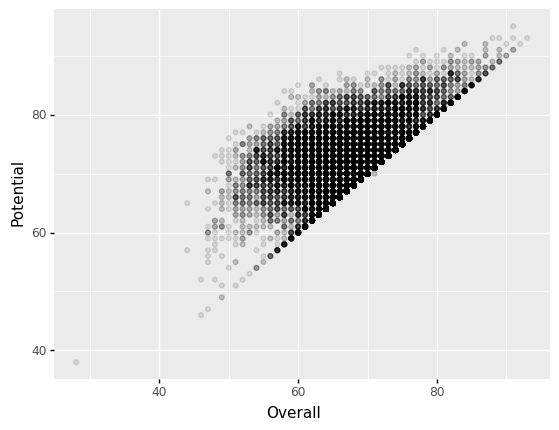

<ggplot: (133752700564)>

In [39]:
ggplot(fifa22)+geom_point(aes(x='Overall', y='Potential'),alpha=0.1)

In [40]:
fifa22['Potential2'] = fifa22['Potential'] - fifa22['Overall']

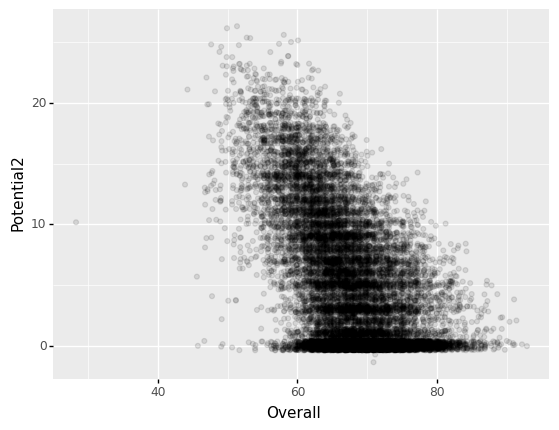

<ggplot: (133753137661)>

In [41]:
ggplot(fifa22)+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter')

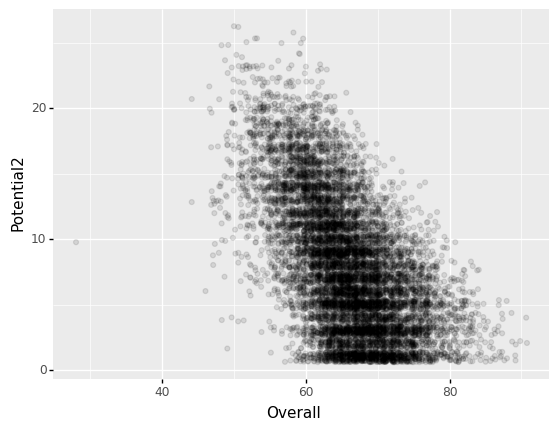

<ggplot: (133752570179)>

In [42]:
ggplot(fifa22.query('Potential2>0.1'))+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter') 

### `구획 나눠서 시각화`

<AxesSubplot:>

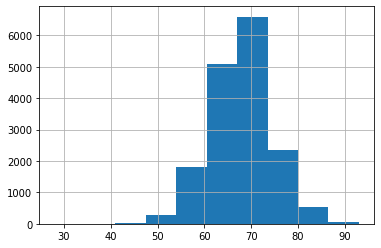

In [43]:
fifa22.Overall.hist()

In [44]:
def f(x): 
    if x>72: y='Q1' 
    elif x>68: y='Q2'
    elif x>63: y='Q3'
    else: y='Q4'
    return y

In [45]:
fifa22['Q']=list(map(f,fifa22.Overall))

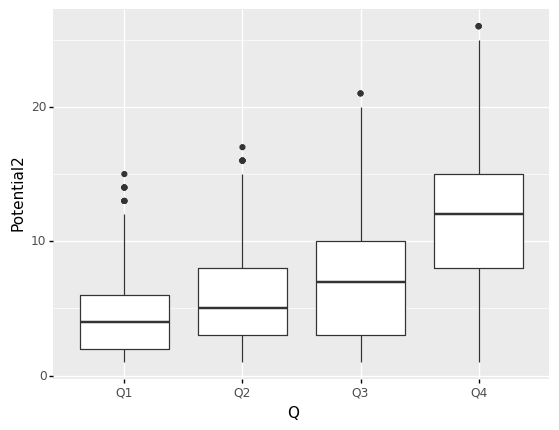

<ggplot: (133755112668)>

In [46]:
ggplot(fifa22.query('Potential2>0.1'))\
+geom_boxplot(aes(x='Q',y='Potential2'))

In [48]:
fifa22.groupby(by='Q').mean()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness,Potential2
Q,,,,,,,,,,,,,,,,,,,,,
Q1,201709.364799,28.326170,76.350653,78.255441,1844.926007,1.626496,3.176823,2.831066,17.057236,60.345484,...,55.358542,52.228876,16.784548,16.630305,16.624864,16.758705,16.976877,76.917573,55.146188,1.904788
Q2,213336.582220,27.405236,70.411781,73.040633,1722.092446,1.108536,3.048814,2.581947,18.576262,55.188710,...,51.731115,49.226441,15.478047,15.266703,15.244887,15.389692,15.560404,71.146441,51.307382,2.628852
Q3,222530.020074,25.744884,66.074449,70.642370,1624.772169,1.024557,2.983824,2.406743,19.722168,51.209511,...,48.641395,46.344720,15.147340,15.015786,14.956149,15.104658,15.248295,67.034886,47.517955,4.567920
Q4,240787.302644,21.998584,59.602691,69.572710,1458.843957,1.003069,2.856232,2.157932,25.944563,43.792965,...,42.165722,40.681238,15.555949,15.391879,15.237724,15.305241,15.611898,60.936969,39.979637,9.970019


In [51]:
fifa22.groupby(by='Q').mean().Overall # Q1,Q2,Q3,Q4의 Overall평균만, 현재 자료형은 float

Q
Q1    76.350653
Q2    70.411781
Q3    66.074449
Q4    59.602691
Name: Overall, dtype: float64

In [52]:
l_=fifa22.groupby(by='Q').mean().Overall 

In [53]:
type(l_)

pandas.core.series.Series

l_은 pandas series형태

In [54]:
l=fifa22.groupby(by='Q').mean().Overall.to_list() # to_list() 해당 자료를 list로 만들겠다

In [56]:
l

[76.3506528835691, 70.4117807472048, 66.07444942506334, 59.60269121813031]

`-` 이제 박스플랏이 들어갈 x축의 위치를 저장할 컬럼을 추가하고 그 이름을 Qx 라고 하자. 

In [61]:
def g(x): 
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [62]:
fifa22['Qx']=list(map(g,fifa22.Q))

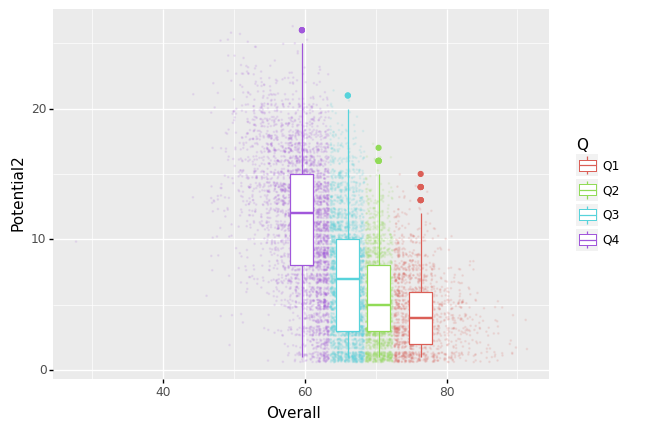

<ggplot: (133757568835)>

In [64]:
ggplot(fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall', y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx', y='Potential2',color='Q')) # 박스플랏이 overall 평균에 위치可

In [61]:
fifa22.query('Q=="Q1" and Potential2>20')

,index_old,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Q,Qx
